## Ejercicio 1

In [4]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC 
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

In [101]:
df=pd.read_csv('misterious_data_2.txt',delimiter="\t", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,315,316,317,318,319,320,321,322,323,324
0,1,-0.405533,2.242719,2.242719,-0.405533,0.095136,2.367101,2.367101,0.095136,2.161999,...,-0.389916,-1.546940,-0.274864,-3.930365,-3.930365,-0.274864,-0.424959,-3.588486,-3.588486,-0.424959
1,1,-1.238295,-1.011814,-1.011814,-1.238295,-1.154385,-0.921107,-0.921107,-1.154385,-1.051711,...,-1.623023,-2.470321,-1.540529,-4.600303,-4.600303,-1.540529,-1.686461,-4.496301,-4.496301,-1.686461
2,1,-0.702202,-2.371735,-2.371735,-0.702202,-0.876015,-1.759448,-1.759448,-0.876015,-2.637602,...,-1.796012,-3.779401,-1.719287,-5.825470,-5.825470,-1.719287,-1.864409,-5.801907,-5.801907,-1.864409
3,1,-0.909662,-1.737973,-1.737973,-0.909662,-0.800335,-1.861995,-1.861995,-0.800335,-1.643449,...,-1.929824,-3.075712,-1.837234,-5.276139,-5.276139,-1.837234,-1.984456,-5.106666,-5.106666,-1.984456
4,1,-0.547449,-2.673609,-2.673609,-0.547449,-0.582630,-2.438873,-2.438873,-0.582630,-2.564881,...,-1.346764,-2.747324,-1.248431,-5.025914,-5.025914,-1.248431,-1.396379,-4.783467,-4.783467,-1.396379


In [102]:
cols = df.columns[df.columns != 0]
X = df[cols]
y = df[0]

In [107]:
for layers in range(1,7):
    # 5-fold cross-validation
    kf = StratifiedKFold(n_splits=5, shuffle = True)

    cv_y_test = []
    cv_y_pred = []

    for train_index, test_index in kf.split(X, y):

        X_train = X.iloc[train_index]
        y_train = y.iloc[train_index]

        perceptron_one_layer = MLPClassifier(hidden_layer_sizes=(layers, 1), max_iter=10000) 
        perceptron_one_layer.fit(X_train, y_train)

        X_test = X.iloc[test_index]
        y_test = y.iloc[test_index]
        y_pred = perceptron_one_layer.predict(X_test)

        cv_y_test.append(y_test)
        cv_y_pred.append(y_pred)

    precision, recall, f1_score, support = precision_recall_fscore_support(np.concatenate(cv_y_test), np.concatenate(cv_y_pred))
    accuracy = accuracy_score(np.concatenate(cv_y_test), np.concatenate(cv_y_pred))

    print("For a Percepton Neural Network of", str(layers), "layers:")
    
    print("Accuracy:", np.round(accuracy, decimals = 4))

    print("Precision for class 1:", np.round(precision[0], decimals = 4))
    print("Precision for class 2:", np.round(precision[1], decimals = 4))
    print("Precision for class 3:", np.round(precision[2], decimals = 4))

    print("Recall for class 1:", np.round(recall[0], decimals = 4))
    print("Recall for class 2:", np.round(recall[1], decimals = 4))
    print("Recall for class 3:", np.round(recall[2], decimals = 4))
    print("\n")

For a Percepton Neural Network of 1 layers:
Accuracy: 0.3846
Precision for class 1: 0.3704
Precision for class 2: 0.4234
Precision for class 3: 0.3095
Recall for class 1: 0.3846
Recall for class 2: 0.6026
Recall for class 3: 0.1667


For a Percepton Neural Network of 2 layers:
Accuracy: 0.6496
Precision for class 1: 0.6275
Precision for class 2: 0.5083
Precision for class 3: 0.9365
Recall for class 1: 0.4103
Recall for class 2: 0.7821
Recall for class 3: 0.7564


For a Percepton Neural Network of 3 layers:
Accuracy: 0.4017
Precision for class 1: 0.3438
Precision for class 2: 0.4688
Precision for class 3: 0.4189
Recall for class 1: 0.4231
Recall for class 2: 0.3846
Recall for class 3: 0.3974


For a Percepton Neural Network of 4 layers:
Accuracy: 0.7436
Precision for class 1: 0.9048
Precision for class 2: 0.8923
Precision for class 3: 0.6142
Recall for class 1: 0.4872
Recall for class 2: 0.7436
Recall for class 3: 1.0


For a Percepton Neural Network of 5 layers:
Accuracy: 0.4957
Precis

In [110]:
# 5-fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(X, y):

    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]

    svc_linear = SVC(kernel = "linear") 
    svc_linear.fit(X_train, y_train)

    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]
    y_pred = svc_linear.predict(X_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

precision, recall, f1_score, support = precision_recall_fscore_support(np.concatenate(cv_y_test), np.concatenate(cv_y_pred))
accuracy = accuracy_score(np.concatenate(cv_y_test), np.concatenate(cv_y_pred))

print("For a Support Vector Classifier with Linear Kernel:")

print("Accuracy:", np.round(accuracy, decimals = 4))

print("Precision for class 1:", np.round(precision[0], decimals = 4))
print("Precision for class 2:", np.round(precision[1], decimals = 4))
print("Precision for class 3:", np.round(precision[2], decimals = 4))

print("Recall for class 1:", np.round(recall[0], decimals = 4))
print("Recall for class 2:", np.round(recall[1], decimals = 4))
print("Recall for class 3:", np.round(recall[2], decimals = 4))

For a Support Vector Classifier with Linear Kernel:
Accuracy: 0.9103
Precision for class 1: 0.88
Precision for class 2: 0.9268
Precision for class 3: 0.9221
Recall for class 1: 0.8462
Recall for class 2: 0.9744
Recall for class 3: 0.9103


Evidentemente, el clasificador que obtuvo mejores resultados fue el Support Vector Classifier con la función kernel linear.

## Ejercicio 2

### Imports

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error, r2_score

### Load Diabetes Dataset

In [ ]:
diabetes = datasets.load_diabetes()
x = diabetes.data
y = diabetes.target
features = diabetes.feature_names
n_features = len(features)

### Linear Regression for each variable

In [ ]:
for var in range(n_features):
    print('-----------VARIABLE', var + 1)
    
    #Obtener MSE y R^2 con validación cruzada
    n_folds = 5
    kf = StratifiedKFold(n_splits = n_folds, shuffle = True, random_state = 1)
    
    mse = 0
    r2 = 0
    for train_index, test_index in kf.split(x, y):
        
        # Training phase
        x_train = x[train_index, var].reshape(-1, 1)
        y_train = y[train_index]

        regr_cv = LinearRegression()
        regr_cv.fit(x_train, y_train)
        
        #Obtener ecuación del modelo
        coeficiente = regr_cv.coef_
        intercepto = regr_cv.intercept_
        
        ecuacion = "y = {}x + {}".format(coeficiente,intercepto)
        print(ecuacion)
        
        # Test phase
        x_test = x[test_index, var].reshape(-1, 1)
        y_test = y[test_index]    
        
        y_pred = regr_cv.predict(x_test)
        
        # Calculate MSE and R^2    
        mse_i = mean_squared_error(y_test, y_pred)

        r2_i = r2_score(y_test, y_pred)

        mse += mse_i 
        r2 += r2_i 
    
    mse = mse/n_folds
    print('Average MSE = ', mse)

    r2 = r2/n_folds
    print('Average R^2 = ', r2)

-----------VARIABLE 1
y = [267.25640859]x + 153.79781798264474
y = [310.2581044]x + 153.8596330970942
y = [360.5796219]x + 150.54693888389536
y = [305.75752374]x + 151.65649825053225
y = [277.4236661]x + 150.8427044383756
Average MSE =  5763.341454267557
Average R^2 =  0.024145134527038304
-----------VARIABLE 2
y = [28.58622204]x + 153.76811434282146
y = [116.13745148]x + 153.67935756033182
y = [94.7712955]x + 150.42122191533957
y = [45.7843784]x + 152.0546422663358
y = [64.40108944]x + 150.8373356166288
Average MSE =  5958.949557467329
Average R^2 =  -0.009944541260300688
-----------VARIABLE 3
y = [948.11138211]x + 151.8006543958266
y = [914.34714921]x + 154.25454084016644
y = [967.46966744]x + 152.77914059983794
y = [945.30215768]x + 150.24654641290635
y = [977.61204429]x + 151.64156986654052
Average MSE =  3918.105240573471
Average R^2 =  0.3363946952263087
-----------VARIABLE 4
y = [716.72653593]x + 152.837268053553
y = [691.05286764]x + 154.47459664810344
y = [721.70048339]x + 149

### Linear Regression for all variables

In [ ]:
# k-fold cross-validation
n_folds = 5
kf = StratifiedKFold(n_splits=n_folds, shuffle = True, random_state = 1)

mse = 0
r2 = 0
for train_index, test_index in kf.split(x,y):

    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]

    regr_cv = LinearRegression()
    regr_cv.fit(x_train, y_train)

    # Test phase
    x_test = x[test_index, :]
    y_test = y[test_index]    

    y_pred = regr_cv.predict(x_test)

    # Calculate MSE and R^2    
    mse_i = mean_squared_error(y_test, y_pred)
    print('mse = ', mse_i)

    r2_i = r2_score(y_test, y_pred)
    print('r^2= ', r2_i)

    mse += mse_i 
    r2 += r2_i 

mse = mse/n_folds
print('Average MSE = ', mse)

r2 = r2/n_folds
print('Average R^2 = ', r2)

mse =  2970.536690079874
r^2=  0.42912874370387344
mse =  2304.8500954943947
r^2=  0.5882759786966656
mse =  3544.378653009114
r^2=  0.41393001318005973
mse =  3357.4422588364514
r^2=  0.47986931027898017
mse =  2944.581059428042
r^2=  0.5257210224031144
Average MSE =  3024.3577513695745
Average R^2 =  0.48738501365253867


### Multilayer Neural Network 

In [ ]:
# k-fold cross-validation
n_folds = 5
kf = StratifiedKFold(n_splits=n_folds, shuffle = True)

mse = 0
r2 = 0
for train_index, test_index in kf.split(x,y):

    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]

    regr_cv = MLPRegressor(random_state=1, max_iter=10000)
    regr_cv.fit(x_train, y_train)

    # Test phase
    x_test = x[test_index, :]
    y_test = y[test_index]    

    y_pred = regr_cv.predict(x_test)

    # Calculate MSE and R^2    
    mse_i = mean_squared_error(y_test, y_pred)
    print('mse = ', mse_i)

    r2_i = r2_score(y_test, y_pred)
    print('r^2= ', r2_i)

    mse += mse_i 
    r2 += r2_i 

mse = mse/n_folds
print('Average MSE = ', mse)

r2 = r2/n_folds
print('Average R^2 = ', r2)

mse =  3283.9270640228997
r^2=  0.3689020657835419
mse =  2176.6915488792392
r^2=  0.6111694207820886
mse =  3103.3181972401526
r^2=  0.4868602276987193
mse =  3509.8700207187794
r^2=  0.45625539503983537
mse =  3121.110011427106
r^2=  0.49728778549075425
Average MSE =  3038.9833684576356
Average R^2 =  0.4840949789589878


La red neuronal multicapa obtuvo un resultado parecido a la regresión lineal. Sin embargo, para la interpretabilidad de los datos es mejor utilizar la regresión lineal. 

## Ejercicio 3

In [ ]:
import pandas as pd
df = pd.read_csv('/content/misterious_data_4.txt')
df


1\t-0.091115906\t0.013829525\t0.013829525\t-0.091115906\t-0.077460582\t-0.001070264\t-0.001070264\t-0.077460582\t-0.002543784\t-0.050739841\t-0.050739841\t-0.002543784\t-0.012285955\t-0.040821728\t-0.040821728\t-0.012285955\t0.202998008\t-0.290878761\t-0.290878761\t0.202998008\t0.341300705\t-0.554516063\t-0.554516063\t0.341300705\t0.116376555\t-0.586930366\t-0.586930366\t0.116376555\t-0.134334907\t-0.254085312\t-0.254085312\t-0.134334907\t-0.058471646\t-0.291017298\t-0.291017298\t-0.058471646\t-0.163336966\t-0.168884272\t-0.168884272\t-0.163336966\t-0.105179069\t-0.179371287\t-0.179371287\t-0.105179069\t-0.092417705\t-0.19718649\t-0.19718649\t-0.092417705\t-0.534720178\t-0.258754016\t-0.258754016\t-0.534720178\t-0.000331736\t-0.875065844\t-0.875065844\t-0.000331736\t-0.018715917\t-0.823034003\t-0.823034003\t-0.018715917\t-0.084779302\t-0.767623608\t-0.767623608\t-0.084779302\t-0.11450389\t-0.689564305\t-0.689564305\t-0.11450389\t-0.876322441\t0.063292533\t0.063292533\t-0.876322441\t-1.348359104\t-0.267298937\t-0.267298937\t-1.348359104\t-0.064701142\t-1.242914873\t-1.242914873\t-0.064701142\t-0.027396622\t-1.372660976\t-1.372660976\t-0.027396622\t-0.225460119\t-1.476418105\t-1.476418105\t-0.225460119\t-0.226766949\t-1.469290023\t-1.469290023\t-0.226766949\t-0.692765181\t-0.269924114\t-0.269924114\t-0.692765181\t-1.638527041\t-0.487134\t-0.487134\t-1.638527041\t-0.104323177\t-1.204625262\t-1.204625262\t-0.104323177\t-0.034648312\t-1.487809025\t-1.487809025\t-0.034648312\t-0.483522453\t-1.723423794\t-1.723423794\t-0.483522453\t-0.477490877\t-1.801596561\t-1.801596561\t-0.477490877\t-0.019047009\t-1.390541794\t-1.390541794\t-0.019047009\t-1.380775436\t-0.906915186\t-0.906915186\t-1.380775436\t-0.138352391\t-1.280546302\t-1.280546302\t-0.138352391\t-0.187040412\t-1.339167105\t-1.339167105\t-0.187040412\t-0.90612192\t-1.561965388\t-1.561965388\t-0.90612192\t-0.928448097\t-1.634393532\t-1.634393532\t-0.928448097\t-0.21618661\t-1.074375527\t-1.074375527\t-0.21618661\t-0.781851277\t-1.493548802\t-1.493548802\t-0.781851277\t-0.336182456\t-1.031863397\t-1.031863397\t-0.336182456\t-0.411527434\t-1.081540359\t-1.081540359\t-0.411527434\t-1.468703295\t-1.129507723\t-1.129507723\t-1.468703295\t-1.492883231\t-1.187441753\t-1.187441753\t-1.492883231\t-0.914859432\t-0.488929491\t-0.488929491\t-0.914859432\t-0.461392526\t-2.094998786\t-2.094998786\t-0.461392526\t-0.613252694\t-0.829307253\t-0.829307253\t-0.613252694\t-0.644653545\t-0.89016809\t-0.89016809\t-0.644653545\t-2.033881567\t-0.924103019\t-0.924103019\t-2.033881567\t-2.030937722\t-0.965222588\t-0.965222588\t-2.030937722\t-0.798201432\t-0.853020401\t-0.853020401\t-0.798201432\t-0.690839318\t-2.551375205\t-2.551375205\t-0.690839318\t-0.835830707\t-1.035938653\t-1.035938653\t-0.835830707\t-0.861652094\t-1.108746338\t-1.108746338\t-0.861652094\t-2.466495417\t-1.167408463\t-1.167408463\t-2.466495417\t-2.463097983\t-1.221038878\t-1.221038878\t-2.463097983\t-0.720163955\t-1.60774616\t-1.60774616\t-0.720163955\t-1.474263403\t-2.701037952\t-2.701037952\t-1.474263403\t-0.946319228\t-1.715175269\t-1.715175269\t-0.946319228\t-0.974872829\t-1.866076994\t-1.866076994\t-0.974872829\t-2.648535917\t-1.914748773\t-1.914748773\t-2.648535917\t-2.645098501\t-2.025754005\t-2.025754005\t-2.645098501\t-0.895450882\t-2.35477927\t-2.35477927\t-0.895450882\t-2.624585947\t-2.413038592\t-2.413038592\t-2.624585947\t-0.743555864\t-2.741769957\t-2.741769957\t-0.743555864\t-0.793741173\t-2.964160795\t-2.964160795\t-0.793741173\t-2.399454891\t-3.053412122\t-3.053412122\t-2.399454891\t-2.406439018\t-3.21410143\t-3.21410143\t-2.406439018\t-0.783076786\t-3.228148382\t-3.228148382\t-0.783076786\t-2.920236935\t-2.000760993\t-2.000760993\t-2.920236935\t-0.35296899\t-3.011217969\t-3.011217969\t-0.35296899\t-0.427656536\t-3.210743053\t-3.210743053\t-0.427656536\t-1.996505836\t-3.406583924\t-3.406583924\t-1.996505836\t-2.010804376\t-3.544032176\t-3.544032176\t-2.010804376\t-0.437461892\t-3.418712249\t-3.418712249\t-0.437461892\

In [ ]:
#Nuevo intento de codigo; Ejercicio 3:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.svm import SVR
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error


datos = pd.read_csv('misterious_data_4.txt', delimiter="\t", header=None)
datos = datos.T
print(datos.head())


X = datos.iloc[:, 1:]
y = datos.iloc[:, 0]


X = abs(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


num_caracteristicas = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

for n in num_caracteristicas:
    
    selector = SelectKBest(score_func=f_regression, k=n)
    X_train_sel = selector.fit_transform(X_train, y_train)
    X_test_sel = selector.transform(X_test)
    
    
    svm = SVR()
    
   
    k = 5
    kfold = KFold(n_splits=k)
    exactitudes = cross_val_score(svm, X_train_sel, y_train, cv=kfold, scoring='neg_mean_squared_error')
    
   
    ECM = -exactitudes.mean()
    
    print(f"Número de características: {n}, Error Cuadrático Medio: {ECM}")


        0         1         2         3         4         5         6    \
0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1 -0.091116 -1.190149 -0.973911 -0.409105 -0.713210 -1.117431 -0.938319   
2  0.013830 -1.362728 -1.307491 -0.916418 -0.826806 -0.723479 -1.017115   
3  0.013830 -1.362728 -1.307491 -0.916418 -0.826806 -0.723479 -1.017115   
4 -0.091116 -1.190149 -0.973911 -0.409105 -0.713210 -1.117431 -0.938319   

        7         8         9    ...       249       250       251       252  \
0  1.000000  1.000000  1.000000  ...  4.000000  4.000000  4.000000  4.000000   
1 -1.120281 -1.699923 -0.450305  ... -1.525165 -0.867320 -1.057665 -0.921517   
2 -1.325518 -0.513893 -1.230195  ... -1.008544 -0.629409 -0.177247 -0.529049   
3 -1.325518 -0.513893 -1.230195  ... -1.008544 -0.629409 -0.177247 -0.529049   
4 -1.120281 -1.699923 -0.450305  ... -1.525165 -0.867320 -1.057665 -0.921517   

        253       254       255       256       257       258  
0  4

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


datos = pd.read_csv('misterious_data_4.txt', delimiter="\t", header=None)
datos = datos.T
print(datos.head())


X = datos.iloc[:, 1:]
y = datos.iloc[:, 0]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


num_caracteristicas = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for n in num_caracteristicas:
    
    estimador = SVR(kernel='linear')
    
    
    selector = RFE(estimador, n_features_to_select=n)
    X_train_sel = selector.fit_transform(X_train, y_train)
    X_test_sel = selector.transform(X_test)
    
   
    estimador.fit(X_train_sel, y_train)
    y_pred = estimador.predict(X_test_sel)
    ECM = mean_squared_error(y_test, y_pred)
    
    print(f"Número de características: {n}, Error Cuadrático Medio: {ECM}")



        0         1         2         3         4         5         6    \
0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1 -0.091116 -1.190149 -0.973911 -0.409105 -0.713210 -1.117431 -0.938319   
2  0.013830 -1.362728 -1.307491 -0.916418 -0.826806 -0.723479 -1.017115   
3  0.013830 -1.362728 -1.307491 -0.916418 -0.826806 -0.723479 -1.017115   
4 -0.091116 -1.190149 -0.973911 -0.409105 -0.713210 -1.117431 -0.938319   

        7         8         9    ...       249       250       251       252  \
0  1.000000  1.000000  1.000000  ...  4.000000  4.000000  4.000000  4.000000   
1 -1.120281 -1.699923 -0.450305  ... -1.525165 -0.867320 -1.057665 -0.921517   
2 -1.325518 -0.513893 -1.230195  ... -1.008544 -0.629409 -0.177247 -0.529049   
3 -1.325518 -0.513893 -1.230195  ... -1.008544 -0.629409 -0.177247 -0.529049   
4 -1.120281 -1.699923 -0.450305  ... -1.525165 -0.867320 -1.057665 -0.921517   

        253       254       255       256       257       258  
0  4

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


datos = pd.read_csv('misterious_data_4.txt', delimiter="\t", header=None)
datos = datos.T
print(datos.head())


X = datos.iloc[:, 1:]
y = datos.iloc[:, 0]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


num_caracteristicas = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for n in num_caracteristicas:
    
    estimador = LinearRegression()
    
    
    selector = RFECV(estimador, min_features_to_select=n)
    X_train_sel = selector.fit_transform(X_train, y_train)
    X_test_sel = selector.transform(X_test)
    
    
    estimador.fit(X_train_sel, y_train)
    y_pred = estimador.predict(X_test_sel)
    ECM = mean_squared_error(y_test, y_pred)
    
    print(f"Número de características: {n}, Error cuadrático medio: {ECM}")



        0         1         2         3         4         5         6    \
0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1 -0.091116 -1.190149 -0.973911 -0.409105 -0.713210 -1.117431 -0.938319   
2  0.013830 -1.362728 -1.307491 -0.916418 -0.826806 -0.723479 -1.017115   
3  0.013830 -1.362728 -1.307491 -0.916418 -0.826806 -0.723479 -1.017115   
4 -0.091116 -1.190149 -0.973911 -0.409105 -0.713210 -1.117431 -0.938319   

        7         8         9    ...       249       250       251       252  \
0  1.000000  1.000000  1.000000  ...  4.000000  4.000000  4.000000  4.000000   
1 -1.120281 -1.699923 -0.450305  ... -1.525165 -0.867320 -1.057665 -0.921517   
2 -1.325518 -0.513893 -1.230195  ... -1.008544 -0.629409 -0.177247 -0.529049   
3 -1.325518 -0.513893 -1.230195  ... -1.008544 -0.629409 -0.177247 -0.529049   
4 -1.120281 -1.699923 -0.450305  ... -1.525165 -0.867320 -1.057665 -0.921517   

        253       254       255       256       257       258  
0  4

Dados los resultados obtenidos, podemos decir que es el método de selección de características recursivo aquel que es mejor para encontrar una solución, ya que, es aquel que aumentando el número de valores a analizar, van disminuyendo los valores de forma más notable. Con los otros, si bien también se muestra una mejora, en especial el tercero que muestra números pequeños, el segundo tiene un cambio más paulatino, y por consiguiente, inspira más confianza. Además de que el primero, si bien también presenta valores bajos en el error cuadrático medio, se tambalea un poco y remonta de nuevo luego de alcanzar el nadir de los valores.

## Ejercicio 4

Problema 4 (25 puntos)
Para el conjunto de datos Diabetes, utilicen el método de regresión LASSO para diferentes valores del parámetro de regularización para encontrar qué características podrían ser las más relevantes para este conjunto de datos.
Repitan el paso anterior, pero con el modelo Ridge.
¿Qué solución les da mayor información sobre la relevancia de las variables de entrada como predictoras de un modelo lineal?

In [2]:
#Libraries
from itertools import cycle
import matplotlib.pyplot as plt
from sklearn.linear_model import lasso_path
from sklearn import datasets

Computing regularization path using the lasso...


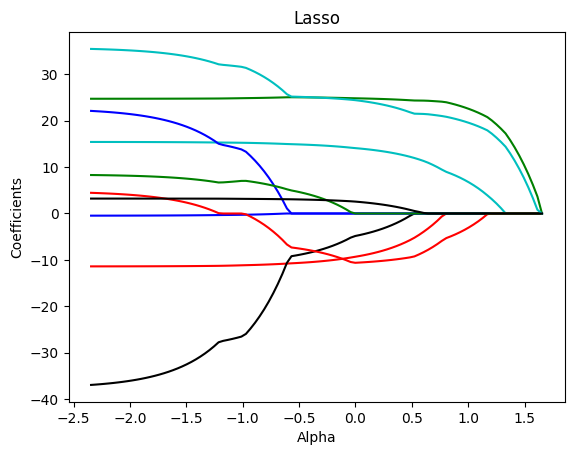

alpha= 1.3315218987211552 
 num coef= bmi
 value= 17.260183190994383

alpha= 1.3315218987211552 
 num coef= bp
 value= 0.050451431071471854

alpha= 1.3315218987211552 
 num coef= s5
 value= 14.40094292915034




In [5]:
#Load dataset
X, y = datasets.load_diabetes(return_X_y=True)

mean=X.std(axis=0)
X /= X.std(axis=0)  # Standardize data (easier to set the l1_ratio parameter)


eps = 1e-4  # the smaller it is the longer is the path

print("Computing regularization path using the lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps=eps)

# Display results

plt.figure(1)
colors = cycle(["b", "r", "g", "c", "k"])
log_alphas_lasso = np.log10(alphas_lasso)
for coef_l, c in zip(coefs_lasso, colors):
    l1 = plt.plot(log_alphas_lasso, coef_l, c=c)


plt.xlabel("Alpha")
plt.ylabel("Coefficients")
plt.title("Lasso")
plt.axis("tight")

plt.show()

relevant_f=3
feature_names=datasets.load_diabetes().feature_names
for coefs in range(len(coefs_lasso[0])):
    cont=0
    s=""
    for co in range(len(coefs_lasso)):
        if coefs_lasso[co][coefs]!=0:
            cont+=1
            s+="alpha= {} \n num coef= {}\n value= {}\n\n".format(log_alphas_lasso[coefs],feature_names[co],coefs_lasso[co][coefs])
        if cont==relevant_f:
            print(s)
            break
    if cont==relevant_f:
        break

In [6]:
print(alphas_lasso,coefs_lasso)

[4.51600300e+01 4.11481374e+01 3.74926503e+01 3.41619066e+01
 3.11270570e+01 2.83618150e+01 2.58422295e+01 2.35464771e+01
 2.14546730e+01 1.95486989e+01 1.78120464e+01 1.62296733e+01
 1.47878738e+01 1.34741599e+01 1.22771527e+01 1.11864843e+01
 1.01927078e+01 9.28721576e+00 8.46216511e+00 7.71040968e+00
 7.02543814e+00 6.40131758e+00 5.83264216e+00 5.31448631e+00
 4.84236199e+00 4.41217990e+00 4.02021400e+00 3.66306927e+00
 3.33765229e+00 3.04114446e+00 2.77097757e+00 2.52481156e+00
 2.30051426e+00 2.09614291e+00 1.90992735e+00 1.74025467e+00
 1.58565524e+00 1.44479000e+00 1.31643884e+00 1.19949004e+00
 1.09293065e+00 9.95837704e-01 9.07370227e-01 8.26761957e-01
 7.53314703e-01 6.86392301e-01 6.25415101e-01 5.69854947e-01
 5.19230604e-01 4.73103588e-01 4.31074370e-01 3.92778911e-01
 3.57885515e-01 3.26091952e-01 2.97122842e-01 2.70727267e-01
 2.46676603e-01 2.24762534e-01 2.04795250e-01 1.86601804e-01
 1.70024614e-01 1.54920096e-01 1.41157422e-01 1.28617385e-01
 1.17191371e-01 1.067804

In [ ]:
ridge_s=[]
ridge_par=[]
ridge_maxp=[]
feature_names=df.feature_names
for i in range(1,1001):
    X=df['data']
    y=df['target']
    ridge=Ridge(alpha=i/100,copy_X=True)
    ridge.fit(X,y)
    ridge_s.append(ridge.score(X,y))
    ridge_maxp.append(max(max(ridge.coef_),abs(min(ridge.coef_))))
    ridge_par.append([feature_names[j] for j in range(len(feature_names)) if ridge.coef_[j] != 0])
max_ridge=max(ridge_maxp)
iml=ridge_par[ridge_maxp.index(max_ridge)]
print("Máx correlation={}\nAlpha max={}\nFeatures={}".format(max_ridge,ridge_maxp.index(max_ridge)+1/1000,iml))

Máx correlation=592.3479586475052
Alpha max=0.001
Features=['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [ ]:
lasob=0
ridgeb=0
for i in range(len(ridge_s)):
    if ridge_s[i]==laso_s[i]:
        print(i,ridge_s[i],ridge_par[i],laso_s[i],laso_par[i])
    elif ridge_s[i]>laso_s[i]:
        # print("ridge",i,ridge_s[i],ridge_par[i])
        ridgeb+=1
    else:
        print("laso",i,laso_s[i],laso_par[i])
        lasob+=1
print("Veces mejor ridge: {}\nVeces mejor lasso: {}".format(ridgeb,lasob))

laso 0 0.5177484222203499 ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Veces mejor ridge: 1000
Veces mejor lasso: 1


Luego de un largo análisis e interpretación, se puede decir que el método Ridge da mejores resultados que el método Lasso, la afirmación procede principalmente de su desempeño bajo circunstancias iguales, ya que pese a ser realmente poca la diferencia (casi tan poca como para considerarla nula) en todos los casos de alpha, excepto alpha=0, fue mejor el método Ridge, para cuyo caso, según la librería es preferible usar la Regresión Lineal a usar alpha=0, aún y pese a esto, los resultados no fueron los mejores,ya que tienen un Score en ambos casos bastante relativo al 0.5, lo que quiere decir que no hay una certeza en los métodos usados y probablemente sería mejor usar modelos diferentes.